
ADVANCED PALS ANALYSIS EXAMPLES

Example 1: Sensitivity to Interface Width
Testing 7 interface widths...

Results:
  Width =   0 nm  →  Fitted thickness = 206.7 nm
  Width =   5 nm  →  Fitted thickness = 206.7 nm
  Width =  10 nm  →  Fitted thickness = 206.5 nm
  Width =  20 nm  →  Fitted thickness = 206.0 nm
  Width =  30 nm  →  Fitted thickness = 205.3 nm
  Width =  50 nm  →  Fitted thickness = 203.5 nm
  Width = 100 nm  →  Fitted thickness = 200.3 nm


C:\Users\jeanv\OneDrive - Delft University of Technology\Uitwisseling - TUDelft\Courses\MEP\Programming\pals_analysis\analysis\sensitivity.py:48: RuntimeWarning: divide by zero encountered in divide
  s_z = 0.52 + (0.575 - 0.52) / (1 + np.exp((z - d_ox) / (w/4)))


Saved: sensitivity_interface_width.pdf

Example 2: Effect of Diffusion Length
Testing diffusion lengths: [ 10  30  50 100 200]
Saved: diffusion_length_effect.pdf

Example 3: S-Parameter Heatmap
Computing 50 × 50 grid points...
Saved: thickness_heatmap.pdf

Example 4: Monte Carlo Uncertainty Analysis
Running 500 Monte Carlo iterations...

Results:
  Thickness: 155.98 ± 4.73 nm
  S-surface: 0.5748 ± 0.0008
Saved: monte_carlo_distributions.pdf

ALL EXAMPLES COMPLETE

Generated files:
  - sensitivity_interface_width.pdf
  - diffusion_length_effect.pdf
  - thickness_heatmap.pdf
  - monte_carlo_distributions.pdf


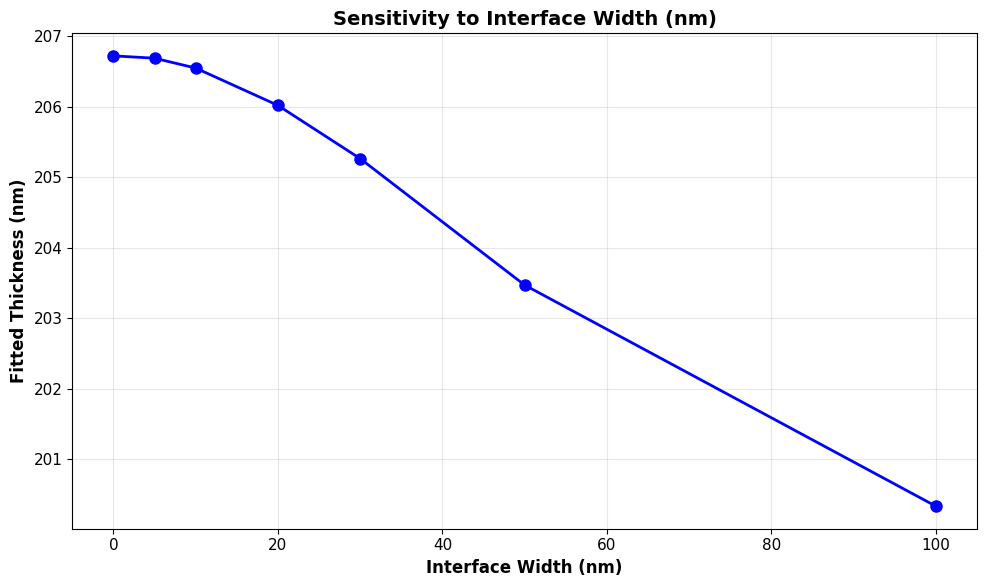

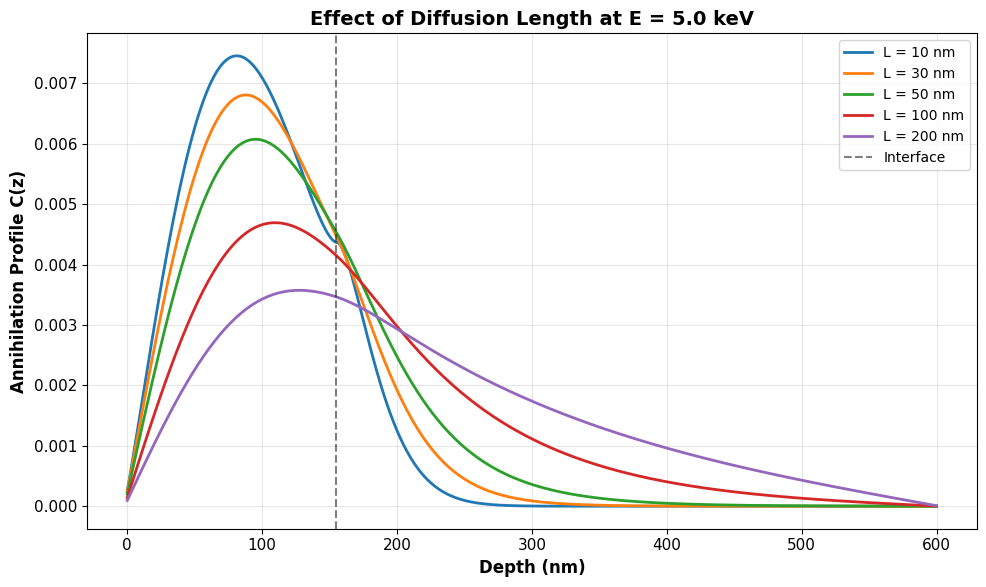

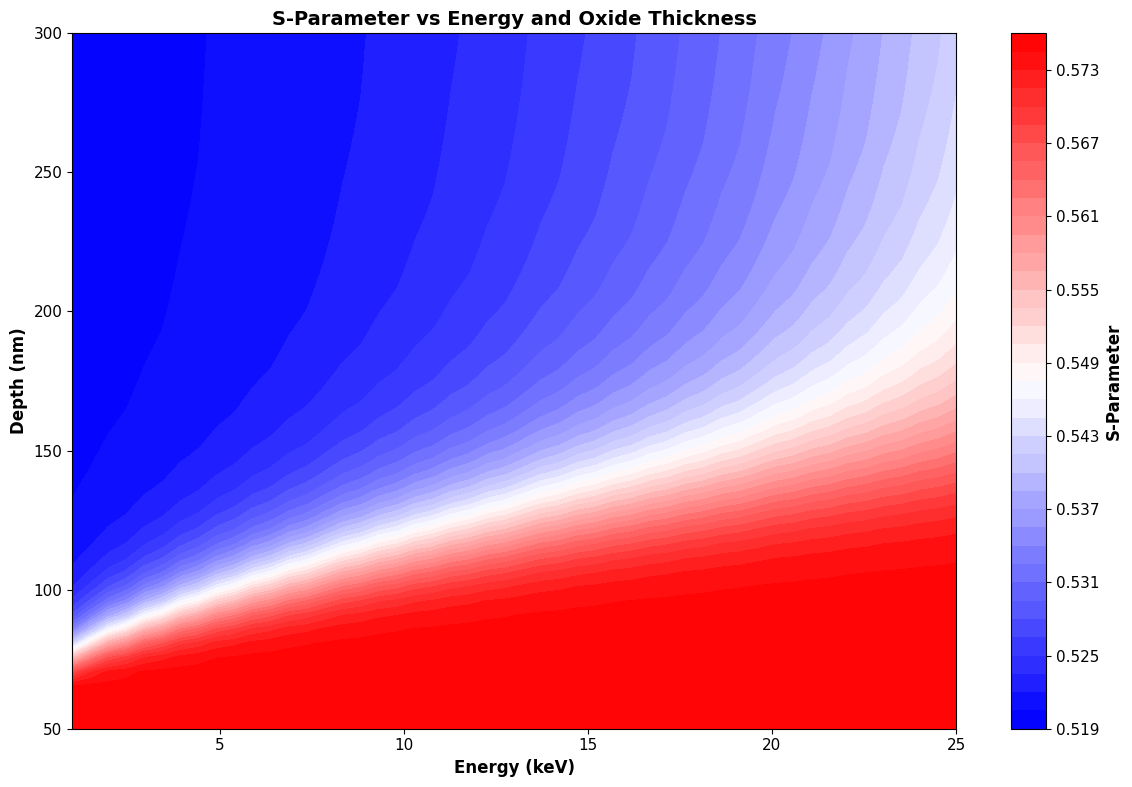

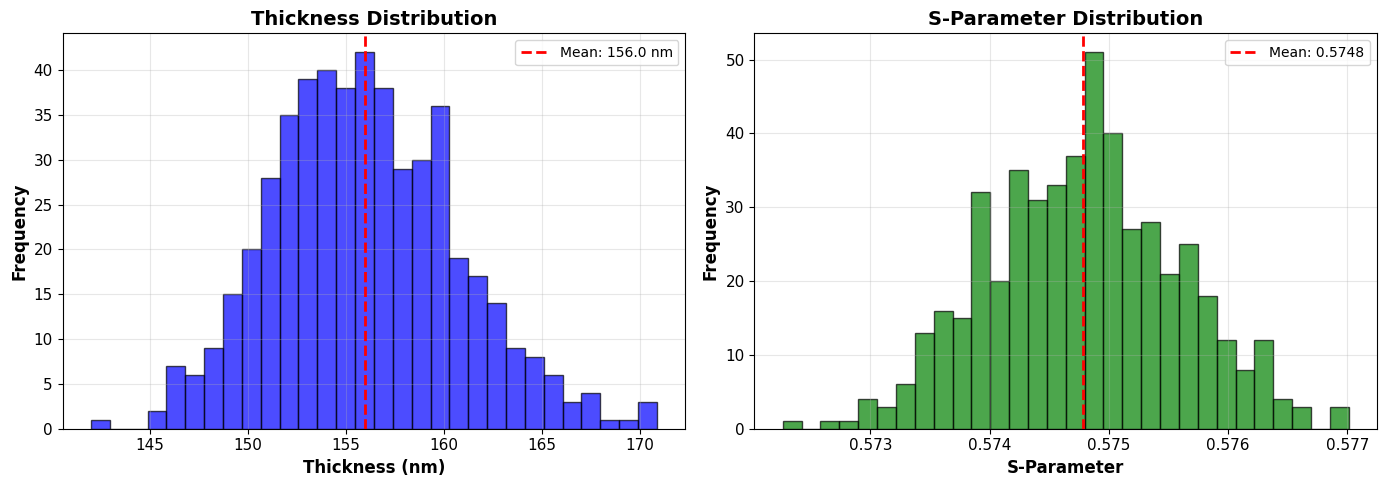

In [2]:
"""Advanced analysis examples showing sensitivity studies and heatmaps."""

import sys
sys.path.insert(0, r'C:\Users\jeanv\OneDrive - Delft University of Technology\Uitwisseling - TUDelft\Courses\MEP\Programming')

import numpy as np
import matplotlib.pyplot as plt
from pals_analysis import config
from pals_analysis.physics import makhov_profile, calculate_annihilation_profile
from pals_analysis.analysis import (
    solve_for_thickness,
    study_interface_width,
    study_diffusion_length,
    study_layer_thickness,
    monte_carlo_uncertainty
)
from pals_analysis.visualization import (
    setup_plot_style,
    plot_s_parameter_fit,
    plot_depth_profiles,
    create_heatmap,
    plot_parameter_sensitivity
)

setup_plot_style()


def example_1_sensitivity_to_interface_width():
    """Show how interface blurring affects fitted thickness."""
    print("=" * 70)
    print("Example 1: Sensitivity to Interface Width")
    print("=" * 70)
    
    # Base configuration
    base_layers = [
        {'thickness': 155, 'density': 5.24, 'L_diff': 30},
        {'thickness': 1000, 'density': 8.00, 'L_diff': 150}
    ]
    
    # Test different interface widths
    width_values = np.array([0, 5, 10, 20, 30, 50, 100])
    
    # Use your experimental data
    energies = config.YOUR_DATA[:, 0]
    s_exp = config.YOUR_DATA[:, 1]
    
    print(f"Testing {len(width_values)} interface widths...")
    results = study_interface_width(energies, s_exp, base_layers, width_values)
    
    print(f"\nResults:")
    for w, d in zip(results['widths'], results['thicknesses']):
        print(f"  Width = {w:3.0f} nm  →  Fitted thickness = {d:.1f} nm")
    
    # Plot sensitivity
    plot_parameter_sensitivity(
        results['widths'], 
        results['thicknesses'],
        'Interface Width (nm)',
        'Fitted Thickness (nm)',
        save_as='sensitivity_interface_width.pdf'
    )
    
    print()


def example_2_diffusion_length_effect():
    """Show how diffusion length affects annihilation profile."""
    print("=" * 70)
    print("Example 2: Effect of Diffusion Length")
    print("=" * 70)
    
    base_layers = [
        {'thickness': 155, 'density': 5.24, 'L_diff': 30},
        {'thickness': 1000, 'density': 8.00, 'L_diff': 150}
    ]
    
    L_values = np.array([10, 30, 50, 100, 200])
    energy = 5.0
    
    print(f"Testing diffusion lengths: {L_values}")
    results = study_diffusion_length(energy, base_layers, L_values)
    
    # Plot profiles for different L values
    fig, ax = plt.subplots(figsize=(10, 6))
    
    for i, L in enumerate(L_values):
        ax.plot(results['z'], results['profiles'][i], 
                label=f'L = {L} nm', linewidth=2)
    
    ax.axvline(155, color='black', linestyle='--', alpha=0.5, label='Interface')
    ax.set_xlabel('Depth (nm)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Annihilation Profile C(z)', fontsize=12, fontweight='bold')
    ax.set_title(f'Effect of Diffusion Length at E = {energy} keV', 
                 fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('diffusion_length_effect.pdf', dpi=300)
    print("Saved: diffusion_length_effect.pdf\n")


def example_3_thickness_heatmap():
    """Create heatmap showing S-parameter vs energy and thickness."""
    print("=" * 70)
    print("Example 3: S-Parameter Heatmap")
    print("=" * 70)
    
    base_layers = [
        {'thickness': 100, 'density': 5.24, 'L_diff': 30},
        {'thickness': 1000, 'density': 8.00, 'L_diff': 150}
    ]
    
    # Parameter ranges
    energies = np.linspace(1, 25, 50)
    thickness_values = np.linspace(50, 300, 50)
    
    print(f"Computing {len(energies)} × {len(thickness_values)} grid points...")
    
    results = study_layer_thickness(energies, thickness_values, base_layers)
    
    # Create heatmap
    create_heatmap(
        energies,
        thickness_values,
        results['s_curves'],
        title='S-Parameter vs Energy and Oxide Thickness',
        save_as='thickness_heatmap.pdf'
    )
    
    print()


def example_4_monte_carlo_uncertainty():
    """Estimate uncertainty using Monte Carlo simulation."""
    print("=" * 70)
    print("Example 4: Monte Carlo Uncertainty Analysis")
    print("=" * 70)
    
    energies = config.YOUR_DATA[:, 0]
    s_exp = config.YOUR_DATA[:, 1]
    s_err = np.full_like(s_exp, 0.002)  # Assume 0.002 uncertainty
    
    print("Running 500 Monte Carlo iterations...")
    results = monte_carlo_uncertainty(energies, s_exp, s_err, n_iterations=500)
    
    print(f"\nResults:")
    print(f"  Thickness: {results['thickness_mean']:.2f} ± {results['thickness_std']:.2f} nm")
    print(f"  S-surface: {results['s_surface_mean']:.4f} ± {results['s_surface_std']:.4f}")
    
    # Plot distributions
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    ax1.hist(results['thickness_values'], bins=30, color='blue', alpha=0.7, edgecolor='black')
    ax1.axvline(results['thickness_mean'], color='red', linestyle='--', linewidth=2,
                label=f"Mean: {results['thickness_mean']:.1f} nm")
    ax1.set_xlabel('Thickness (nm)', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Frequency', fontsize=12, fontweight='bold')
    ax1.set_title('Thickness Distribution', fontsize=14, fontweight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    ax2.hist(results['s_surface_values'], bins=30, color='green', alpha=0.7, edgecolor='black')
    ax2.axvline(results['s_surface_mean'], color='red', linestyle='--', linewidth=2,
                label=f"Mean: {results['s_surface_mean']:.4f}")
    ax2.set_xlabel('S-Parameter', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Frequency', fontsize=12, fontweight='bold')
    ax2.set_title('S-Parameter Distribution', fontsize=14, fontweight='bold')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('monte_carlo_distributions.pdf', dpi=300)
    print("Saved: monte_carlo_distributions.pdf\n")


def main():
    """Run all advanced examples."""
    print("\n" + "=" * 70)
    print("ADVANCED PALS ANALYSIS EXAMPLES")
    print("=" * 70 + "\n")
    
    example_1_sensitivity_to_interface_width()
    example_2_diffusion_length_effect()
    example_3_thickness_heatmap()
    example_4_monte_carlo_uncertainty()
    
    print("=" * 70)
    print("ALL EXAMPLES COMPLETE")
    print("=" * 70)
    print("\nGenerated files:")
    print("  - sensitivity_interface_width.pdf")
    print("  - diffusion_length_effect.pdf")
    print("  - thickness_heatmap.pdf")
    print("  - monte_carlo_distributions.pdf")
    
    plt.show()


if __name__ == "__main__":
    main()
